In [1]:
#Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Save file path to variable
dropout_csv = "Modified_data.csv"
# Read with Pandas
dropout_df = pd.read_csv(dropout_csv)
dropout_df.head()

,Year,Sex,Ethnicity,Percentage,Count (000s)
0,2000,NaN,NaN,23.5,6234.0
1,2001,NaN,NaN,23.8,6386.0
2,2002,NaN,NaN,23.7,6475.0
3,2003,NaN,NaN,22.7,6230.0
4,2004,NaN,NaN,22.1,6160.0


In [4]:
#Bring in 2015 data
# Save file path to variable
SY2015_csv = "SY2015_data.csv"
# Read with Pandas
SY2015_df = pd.read_csv(SY2015_csv)
SY2015_df

,Year,Sex,Ethnicity,Percentage,Count (000s)
0,2015,NaN,NaN,16.9,5077.0
1,2015,Male,NaN,17.7,2682.0
2,2015,Female,NaN,16.0,2395.0
3,2015,NaN,White,14.2,2340.0
4,2015,NaN,Black,18.6,806.0
5,2015,NaN,Hispanic,23.7,1541.0
6,2015,NaN,Asian,9.5,157.0
7,2015,NaN,Pacific Islander,20.9,NaN
8,2015,NaN,American Indian,22.6,63.0
9,2015,NaN,Two or more races,20.1,146.0


In [6]:
#2015 TOTAL COUNTS = 5,077
#Clear out summary data
SY2015_dfc = SY2015_df.dropna()
SY2015_dfc.head()

,Year,Sex,Ethnicity,Percentage,Count (000s)
10,2015,Male,White,14.8,1244.0
11,2015,Male,Black,19.3,404.0
12,2015,Male,Hispanic,25.1,832.0
13,2015,Male,Asian,9.5,79.0
15,2015,Male,American Indian,26.7,39.0


In [7]:
#Group dropout data by gender
SY2015_gender = SY2015_dfc.groupby("Sex")
SY2015_gender.sum()

,Year,Percentage,Count (000s)
Sex,,,
Female,10075,81.4,2355.0
Male,12090,117.8,2673.0


In [8]:
#Validate
2355 + 2673

5028

([<matplotlib.patches.Wedge at 0x22ce2585108>,
 [Text(0.10910128137370143, 1.0945761327576153, 'Female'),
  Text(-0.10910138385531518, -1.0945761225428112, 'Male')],
 [Text(0.059509789840200764, 0.5970415269586992, '46.8%'),
  Text(-0.05950984573926281, -0.5970415213869879, '53.2%')])

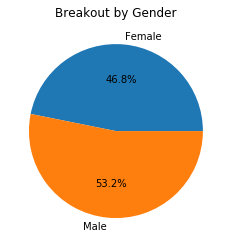

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Female", "Male"]
gcounts = [2355, 2673]

plt.title("Breakout by Gender")
plt.pie(gcounts, labels=genders, autopct="%1.1f%%")

In [10]:
#Group dropout data by ethnicity
SY2015_ethnic = SY2015_dfc.groupby("Ethnicity")
SY2015_ethnic.sum()

,Year,Percentage,Count (000s)
Ethnicity,,,
American Indian,2015,26.7,39.0
Asian,4030,19.1,156.0
Black,4030,37.2,807.0
Hispanic,4030,47.4,1541.0
Two or more races,4030,40.5,146.0
White,4030,28.3,2339.0


In [11]:
#Validate
39+156+807+1541+146+2339

5028

([<matplotlib.patches.Wedge at 0x22ce2613188>,
 [Text(1.0996734274823512, 0.02680210605938154, 'American Indian'),
  Text(1.0882637368529815, 0.16025616696646922, 'Asian'),
  Text(0.8064238276833133, 0.7481180455948073, 'Black'),
  Text(-0.6606051503489535, 0.8795458119577607, 'Hispanic'),
  Text(-1.0910763177609872, -0.13983014274871255, 'Two or More'),
  Text(0.12003822724095478, -1.0934307586678038, 'White')],
 [Text(0.5998218695358278, 0.014619330577844475, '0.8%'),
  Text(0.5935984019198081, 0.08741245470898319, '3.1%'),
  Text(0.4398675423727163, 0.4080643885062585, '16.1%'),
  Text(-0.36033008200852007, 0.47975226106786945, '30.6%'),
  Text(-0.5951325369605385, -0.07627098695384321, '2.9%'),
  Text(0.06547539667688441, -0.5964167774551656, '46.5%')])

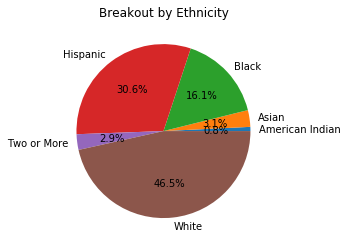

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
ethnicities = ["American Indian", "Asian", "Black", "Hispanic", "Two or More", "White"]
ecounts = [39, 156, 807, 1541, 146, 2339]

plt.title("Breakout by Ethnicity")
plt.pie(ecounts, labels=ethnicities, autopct="%1.1f%%")

In [ ]:
#NEXT STEPS - LINE GRAPHS SHOWING ETHNICITY RATES OVER TIME